Importing the necessary libraries


In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
raw_Data = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')

In [257]:
print(raw_Data.shape)

(1004847, 28)


In [258]:
crime_data = raw_Data.copy()

In [259]:
print("Dataset shape:", crime_data.shape)
crime_data.head()

Dataset shape: (1004847, 28)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [260]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [261]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004831e+06,327193.000000,1.004836e+06,69130.000000,2315.000000,64.00000,1.004847e+06,1.004847e+06
mean,2.202171e+08,1.339911e+03,1.069147e+01,1.115607e+03,1.400307e+00,5.001353e+02,2.891905e+01,3.056073e+02,363.944543,4.998958e+02,958.115941,984.022030,991.21875,3.399820e+01,-1.180908e+02
std,1.318835e+07,6.510691e+02,6.110286e+00,6.111622e+02,4.899607e-01,2.052622e+02,2.199224e+01,2.192915e+02,123.741225,2.050627e+02,110.359911,52.340476,27.06985,1.610827e+00,5.582785e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106168e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209158e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311101e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521040e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [262]:
crime_data.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [263]:
# Check null values
missing_values = crime_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(crime_data)) * 100

# Display columns with missing data
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percent Missing
Crm Cd 4,1004783,99.993631
Crm Cd 3,1002532,99.769617
Crm Cd 2,935717,93.120346
Cross Street,850626,84.652290
Weapon Used Cd,677654,67.438525
Weapon Desc,677654,67.438525
Mocodes,151591,15.085978
Vict Descent,144616,14.391843
Vict Sex,144604,14.390649
Premis Desc,588,0.058516


In [264]:
 # Convert DATE OCC to datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Create new time-based features
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month
crime_data['Day'] = crime_data['DATE OCC'].dt.day

# Covering time_occ to HH:MM format
crime_data['TIME OCC'] = crime_data['TIME OCC'].astype(str).str.zfill(4)
crime_data['TIME OCC'] = crime_data['TIME OCC'].str[:2] + ':' + crime_data['TIME OCC'].str[2:]




In [265]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9


In [266]:
crime_data.drop_duplicates(inplace=True)

In [267]:
# Weekday from date (0 = Monday, 6 = Sunday)
crime_data['Weekday'] = crime_data['DATE OCC'].dt.day_name()

# Map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

crime_data['Season'] = crime_data['Month'].apply(get_season)

In [268]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Weekday,Season
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1,Sunday,Spring
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,Saturday,Winter
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,Wednesday,Autumn
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,Tuesday,Spring
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9,Wednesday,Autumn


In [269]:
# Count of rows with negative victim age
negative_age_count = crime_data[crime_data['Vict Age'] <= 0].shape[0]
print(f"Number of rows with negative and zero victim age: {negative_age_count}")

Number of rows with negative and zero victim age: 269284


In [270]:
# Keeping only the rows where Vict Age is a positive number and not missing.
crime_data = crime_data[crime_data['Vict Age'].notnull()]
crime_data = crime_data[crime_data['Vict Age'] > 0]

In [271]:
# cleaning the vict age and vict descent column and normalizing them
crime_data['Vict Sex'] = crime_data['Vict Sex'].replace({'X': 'Unknown','NAN': 'Unknown'}).fillna('Unknown')
crime_data['Vict Descent'] = crime_data['Vict Descent'].replace({'X': 'Unknown','NAN': 'Unknown','-': 'Unknown'}).fillna('Unknown')

<ipython-input-271-ba8c91a2ee37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Vict Sex'] = crime_data['Vict Sex'].replace({'X': 'Unknown','NAN': 'Unknown'}).fillna('Unknown')


In [272]:
print(crime_data['Vict Sex'].value_counts())
print(crime_data['Vict Descent'].value_counts())

Vict Sex
M          370260
F          354653
Unknown     10538
H             112
Name: count, dtype: int64
Vict Descent
H          291499
W          186518
B          134248
O           64599
A           21000
Unknown     17172
K            5960
F            4817
C            4622
J            1583
V            1186
I            1014
Z             577
P             287
U             186
D              91
L              77
G              74
S              53
Name: count, dtype: int64


In [273]:
# converting the categorical column to uppercase
for col in ['AREA NAME', 'Crm Cd Desc', 'Weapon Desc', 'Status', 'Vict Sex', 'Vict Descent']:
    if col in crime_data.columns:
        crime_data[col] = crime_data[col].astype(str).str.upper()

In [274]:
# cleaning weapon desc column
if 'Weapon Desc' in crime_data.columns:
    crime_data['Weapon Desc'] = crime_data['Weapon Desc'].fillna('UNKNOWN')

In [275]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Weekday,Season
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,CENTRAL,182,1,330,BURGLARY FROM VEHICLE,...,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,Saturday,Winter
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,SOUTHWEST,356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,Wednesday,Autumn
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,VAN NUYS,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,Tuesday,Spring
11,200406391,03/02/2020 12:00:00 AM,2020-03-01,14:30,4,HOLLENBECK,407,1,310,BURGLARY,...,NaN,4500 HUNTINGTON DR,NaN,34.0881,-118.1877,2020,3,1,Sunday,Spring
19,200606074,02/12/2020 12:00:00 AM,2020-02-07,16:15,6,HOLLYWOOD,646,2,805,PIMPING,...,NaN,HOLLYWOOD,MC CADDEN,34.1016,-118.3370,2020,2,7,Friday,Winter


In [276]:
# Crime types
print(crime_data['Crm Cd Desc'].value_counts())

# Victim sex and descent
print(crime_data['Vict Sex'].value_counts())
print(crime_data['Vict Descent'].value_counts())

# Crime areas
print(crime_data['AREA NAME'].value_counts())


Crm Cd Desc
BATTERY - SIMPLE ASSAULT                          73875
BURGLARY FROM VEHICLE                             61553
THEFT OF IDENTITY                                 61344
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    51498
THEFT PLAIN - PETTY ($950 & UNDER)                46928
                                                  ...  
PETTY THEFT - AUTO REPAIR                             2
LYNCHING - ATTEMPTED                                  1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
TRAIN WRECKING                                        1
DRUNK ROLL - ATTEMPT                                  1
Name: count, Length: 138, dtype: int64
Vict Sex
M          370260
F          354653
UNKNOWN     10538
H             112
Name: count, dtype: int64
Vict Descent
H          291499
W          186518
B          134248
O           64599
A           21000
UNKNOWN     17172
K            5960
F            4817
C            4622
J            1583
V            1186
I            10

Objective 1: Monthly and Yearly Crime Trends

In [277]:
# Convert DATE OCC to datetime
raw_Data['DATE OCC'] = pd.to_datetime(raw_Data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p',errors='coerce')

# Extract Year and Month
raw_Data['Year'] = raw_Data['DATE OCC'].dt.year
raw_Data['Month'] = raw_Data['DATE OCC'].dt.month
raw_Data['Day'] = raw_Data['DATE OCC'].dt.day
# # Ensure TIME OCC is a 4-digit string (e.g., 0900, 1345)
# df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Extract hour as integer
crime_data['Hour'] = crime_data['TIME OCC'].str[:2].astype(int)

# Check result
crime_data[['TIME OCC', 'Hour']].head()


# # Yearly trend
# yearly_trend = raw_Data['Year'].value_counts().sort_index()
# yearly_trend.plot(kind='bar', title='Yearly Crime Trend', xlabel='Year', ylabel='Number of Crimes')
# plt.show()

# # Monthly trend
# monthly_trend = raw_Data['Month'].value_counts().sort_index()
# monthly_trend.plot(kind='bar', title='Monthly Crime Trend', xlabel='Month', ylabel='Number of Crimes')
# plt.show()


,TIME OCC,Hour
1,18:00,18
2,17:00,17
3,20:37,20
11,14:30,14
19,16:15,16


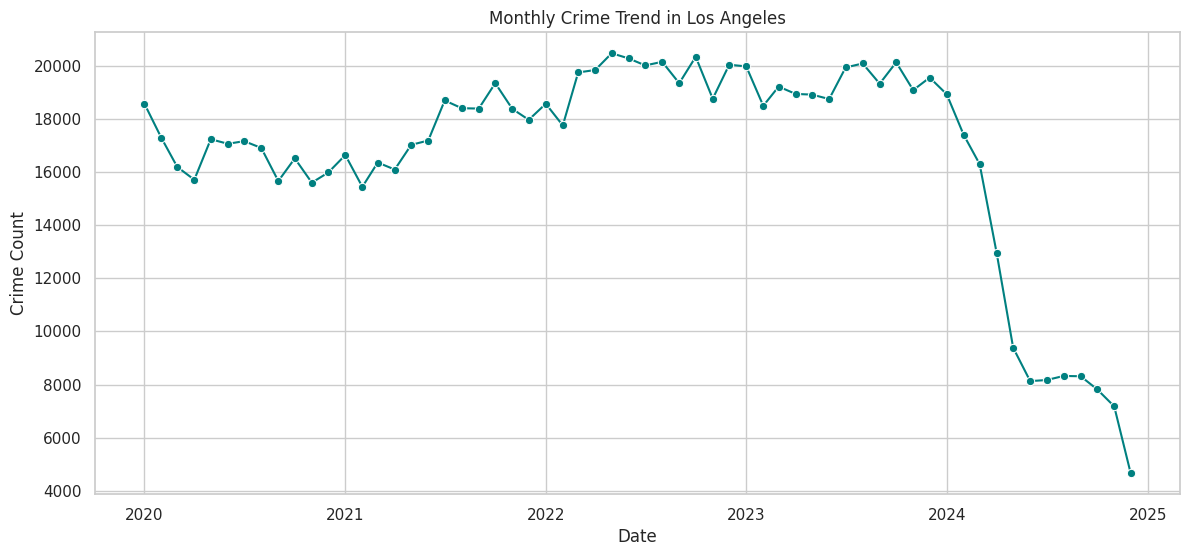

In [278]:
monthly_trend = raw_Data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(DAY=1))

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='Date', y='Crime Count', marker='o', color='teal')
plt.title('Monthly Crime Trend in Los Angeles')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

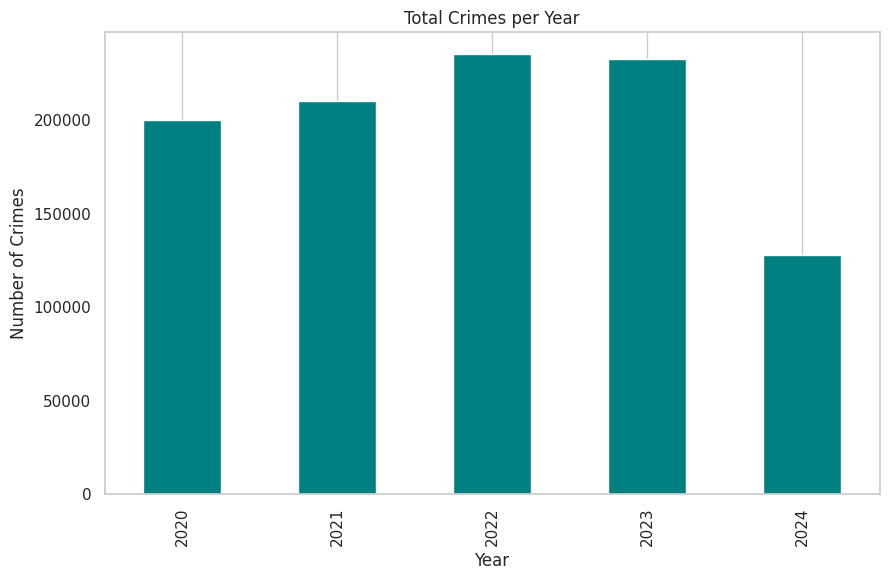

In [279]:
# Grouping by year
yearly_trends = raw_Data.groupby('Year').size()

# Grouping by month and year for detailed trend
monthly_trends = raw_Data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

# Pivot to prepare for heatmap
monthly_pivot = monthly_trends.pivot(index='Month', columns='Year', values='Crime Count')

# Plotting yearly trend
plt.figure(figsize=(10, 6))
yearly_trends.plot(kind='bar', color='teal')
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

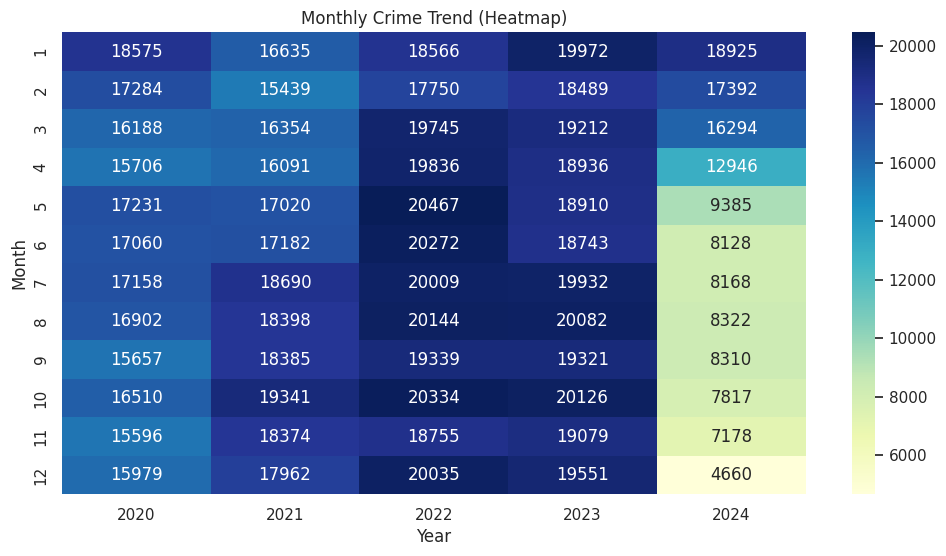

In [280]:
# Heatmap for monthly trend
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Monthly Crime Trend (Heatmap)')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

 Determine the frequency and proportion of various crime types

<ipython-input-281-61e4c27b62cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, palette='viridis',)


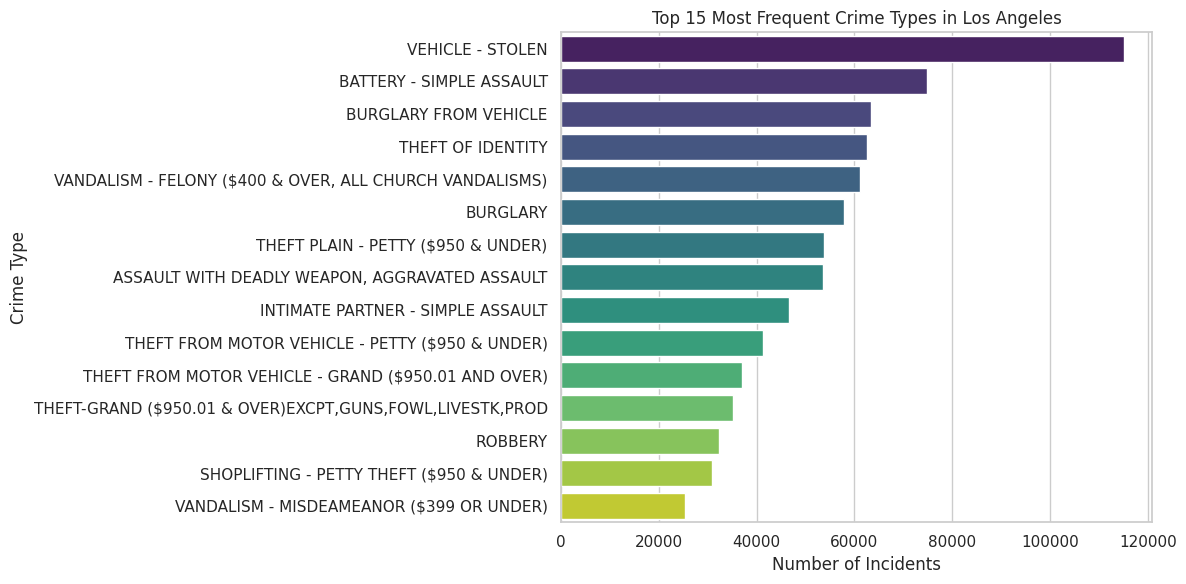

,Crime Type,Proportion (%)
0,VEHICLE - STOLEN,11.462840
1,BATTERY - SIMPLE ASSAULT,7.445611
2,BURGLARY FROM VEHICLE,6.320465
3,THEFT OF IDENTITY,6.223236
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",6.078935
5,BURGLARY,5.759484
6,THEFT PLAIN - PETTY ($950 & UNDER),5.345689
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",5.326682
8,INTIMATE PARTNER - SIMPLE ASSAULT,4.648469
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),4.111173


In [281]:
# Frequency of crime types
crime_type_counts = raw_Data['Crm Cd Desc'].value_counts().head(15)  # Top 15 for better visualization

# Proportion of each crime type
crime_type_proportion = (crime_type_counts / raw_Data.shape[0]) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, palette='viridis',)
plt.title('Top 15 Most Frequent Crime Types in Los Angeles')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

# Display proportion
crime_type_proportion = crime_type_proportion.reset_index()
crime_type_proportion.columns = ['Crime Type', 'Proportion (%)']
display(crime_type_proportion)


In [282]:
# Frequency of crimes by AREA NAME
area_crime_counts = raw_Data['AREA NAME'].value_counts().reset_index()
area_crime_counts.columns = ['Area Name', 'Crime Count']
area_crime_counts['Proportion (%)'] = (area_crime_counts['Crime Count'] / len(raw_Data)) * 100

# Display top 10 areas
area_crime_counts.head(10)

,Area Name,Crime Count,Proportion (%)
0,Central,69671,6.933493
1,77th Street,61752,6.145413
2,Pacific,59500,5.921299
3,Southwest,57430,5.715298
4,Hollywood,52438,5.218506
5,N Hollywood,51106,5.085948
6,Olympic,50062,4.982052
7,Southeast,49926,4.968518
8,Newton,49174,4.893680
9,Wilshire,48238,4.800532


<ipython-input-283-87d705f716e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


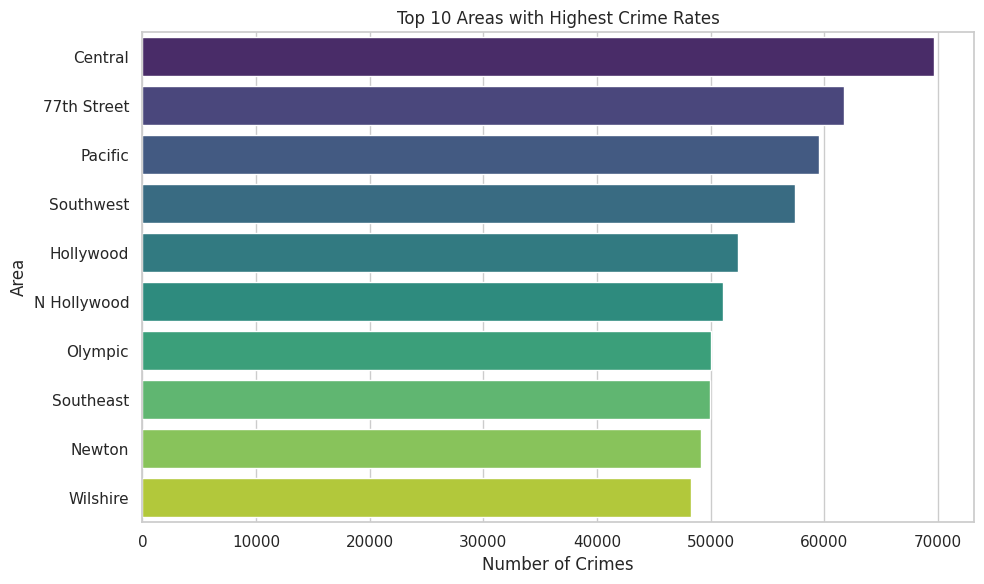

In [283]:
# Top 10 areas with most reported crimes
top_areas = raw_Data['AREA NAME'].value_counts().head(10)
buttom_areas = raw_Data['AREA NAME'].value_counts().tail(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title("Top 10 Areas with Highest Crime Rates")
plt.xlabel("Number of Crimes")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


<ipython-input-284-c34a08850d1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=buttom_areas.values, y=buttom_areas.index, palette='viridis')


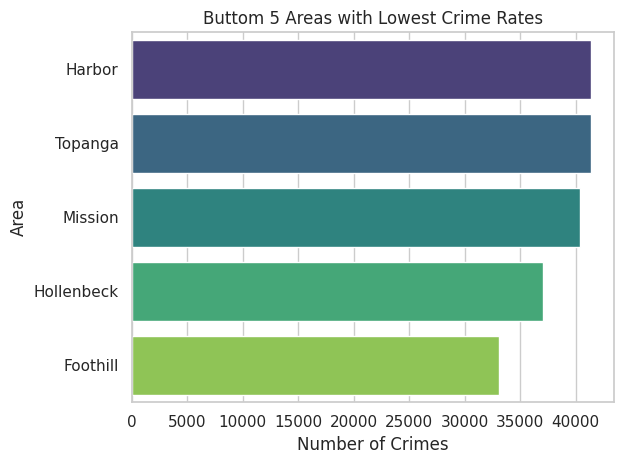

In [284]:
sns.barplot(x=buttom_areas.values, y=buttom_areas.index, palette='viridis')
plt.title("Buttom 5 Areas with Lowest Crime Rates")
plt.xlabel("Number of Crimes")
plt.ylabel("Area")
plt.tight_layout()
plt.show()

<ipython-input-285-a6c48000260f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_count.values, y=crime_type_count.index, palette='Blues_r')


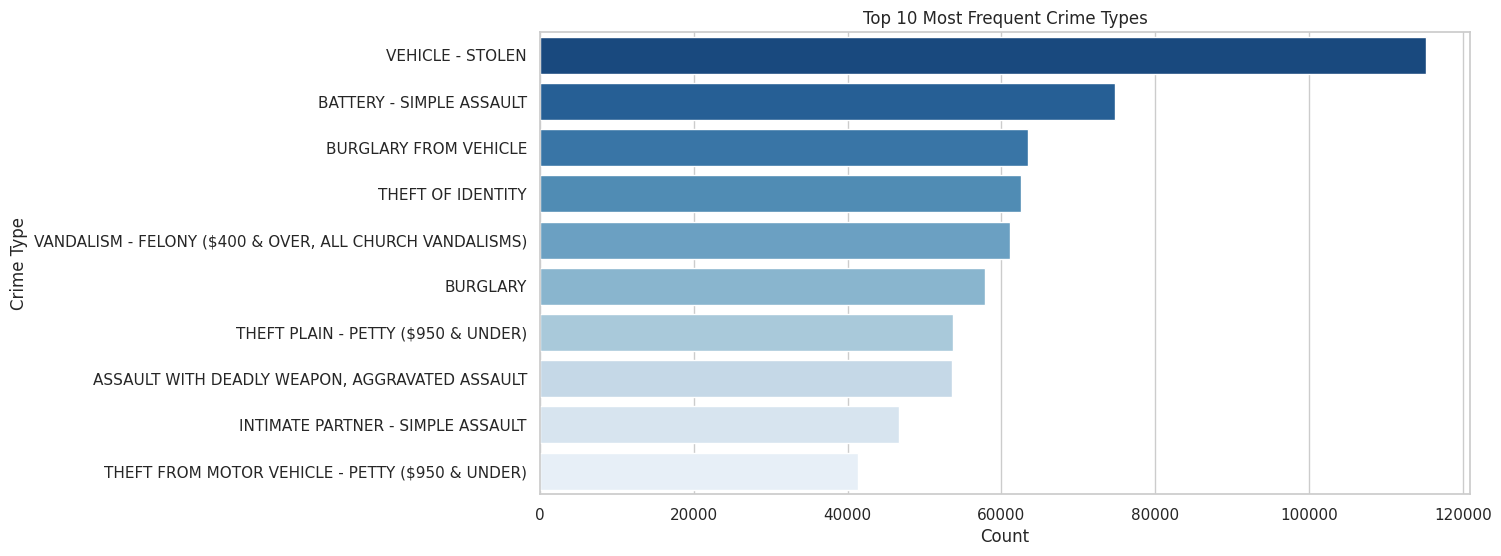

In [285]:
crime_type_count = raw_Data['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=crime_type_count.values, y=crime_type_count.index, palette='Blues_r')
plt.title('Top 10 Most Frequent Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()
# 'viridis'

Analyze the age, gender, and race of victims and suspects to identify demographic trends.

In [286]:
# Count of rows with negative victim age
negative_age_count = crime_data[crime_data['Vict Age'] < 0].shape[0]
print(f"Number of rows with negative victim age: {negative_age_count}")


Number of rows with negative victim age: 0


In [287]:
crime_data.shape

(735563, 34)

In [288]:
crime_data[(crime_data['LAT'] == 0.0) | (crime_data['LON'] == 0.0)].shape
crime_data[['LAT', 'LON']].isnull().sum()

,0
LAT,0
LON,0


In [289]:

print(crime_data.shape)

(735563, 34)


In [290]:
print("raw Data:", raw_Data.shape)
print("Crime Data (after dropping rows):", crime_data.shape)

raw Data: (1004847, 31)
Crime Data (after dropping rows): (735563, 34)


In [291]:
missing_location = raw_Data[['LAT', 'LON']].isnull().sum()
print("Missing LAT/LON:\n", missing_location)


Missing LAT/LON:
 LAT    0
LON    0
dtype: int64


In [292]:
valid_location = crime_data.dropna(subset=['LAT', 'LON'])
print("Rows with valid location:", valid_location.shape[0])


Rows with valid location: 735563


In [293]:
map_data = raw_Data.dropna(subset=['LAT', 'LON'])
map_data = map_data[(map_data['LAT'] != 0) & (map_data['LON'] != 0)]
print("Usable rows for map:", map_data.shape)

Usable rows for map: (1002607, 31)


 OBJECTIVE 3: Identify areas with high concentrations of criminal activity

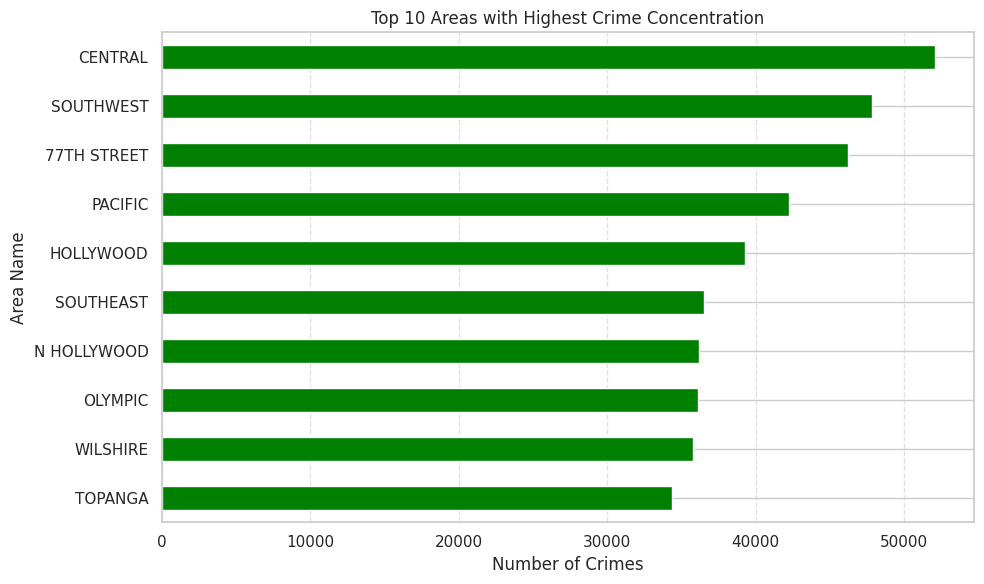

In [294]:

# Count crimes by area
top_areas = crime_data['AREA NAME'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_areas.plot(kind='barh', color='green')
plt.title('Top 10 Areas with Highest Crime Concentration')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [295]:
import folium
from folium.plugins import HeatMap, MarkerCluster

# Drop rows with missing coordinates
crime_map_data = crime_data[['LAT', 'LON', 'Premis Desc']].dropna()

# Create base map with visually appealing tiles
la_center = [34.0522, -118.2437]
crime_map = folium.Map(location=la_center, zoom_start=11, tiles='CartoDB positron')  # Cleaner tile style

# Prepare data for heatmap
heat_data = crime_map_data[['LAT', 'LON']].values.tolist()

# Add heatmap layer
HeatMap(heat_data[:], radius=10, blur=15, min_opacity=0.5).add_to(crime_map)

# OPTIONAL: Add clustered markers for detailed inspection
marker_cluster = MarkerCluster().add_to(crime_map)
for index, row in crime_map_data[:50000].iterrows():  # Limit for performance
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Premise: {row['Premis Desc']}"
    ).add_to(marker_cluster)

# Display map
crime_map


Output hidden; open in https://colab.research.google.com to view.

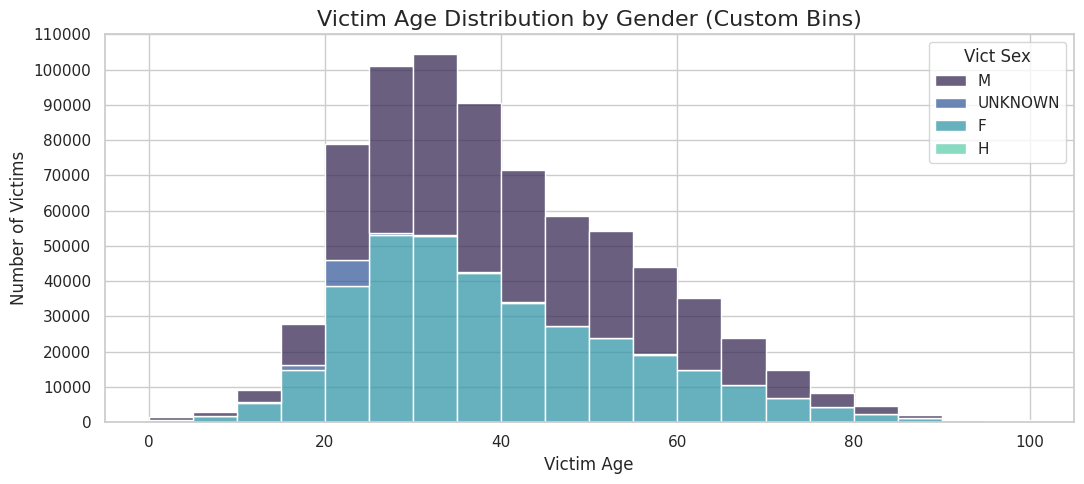

In [296]:

# Set Seaborn theme
sns.set(style="whitegrid")

# Age distribution
# Custom Age Range Filtering (Optional)
# filtered_data = crime_data[(crime_data['Vict Age'] >= 10) & (crime_data['Vict Age'] <= 80)]

# # Custom bins every 5 years from 10 to 80
# custom_bins = np.arange(10, 85, 5)

# # Plot with custom settings
# plt.figure(figsize=(14, 6))
# sns.histplot(
#     data=filtered_data,
#     x='Vict Age',
#     bins=35,
#     kde=True,
#     hue='Vict Sex',
#     multiple='stack',
#     palette='Set2'
# )

# plt.title('Victim Age Distribution by Gender (Age 10–80, Bin size 5)', fontsize=16)
# plt.xlabel('Age')
# plt.ylabel('Number of Victims')
# plt.xticks(custom_bins)
# plt.tight_layout()
# plt.show()
# #

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the style
# sns.set(style="whitegrid")

# Define custom bin edges (example: bins of 5 years from age 0 to 100)
custom_bins = list(range(0, 105, 5))  # 0, 5, 10, ..., 100

# Create the histogram
plt.figure(figsize=(11, 5))
hist = sns.histplot(
    data=crime_data,
    x='Vict Age',
    bins=custom_bins,
    kde=False,
    hue='Vict Sex',
    multiple='stack',
    palette='mako'
)

# Get the max bar height
max_height = max([p.get_height() for p in hist.patches])

# Set y-axis range and custom ticks
plt.ylim(0, max_height + 1)
plt.yticks(range(0, 120000, 10000))  # Change step size as needed

# Labels and title
plt.title('Victim Age Distribution by Gender (Custom Bins)', fontsize=16)
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.tight_layout()
plt.show()


<ipython-input-297-4d2d33e644be>:15: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


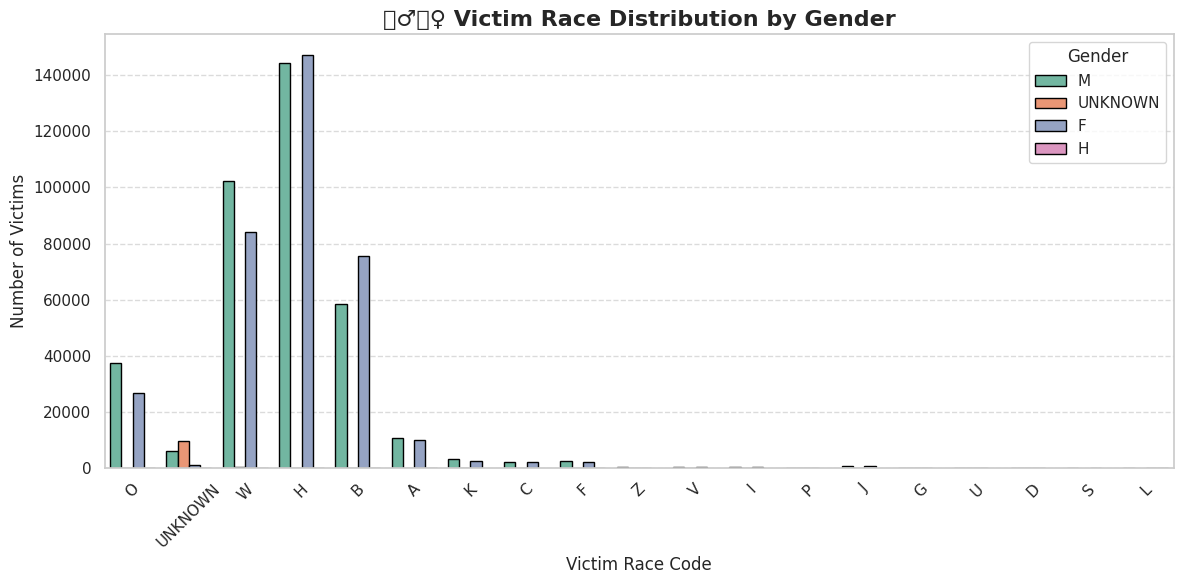

In [297]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=crime_data,
    x='Vict Descent',
    hue='Vict Sex',
    palette='Set2',
    edgecolor='black'
)
plt.title('🧍‍♂️🧍‍♀️ Victim Race Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Victim Race Code', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-298-62a07579b5df>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = crime_data.pivot_table(
<ipython-input-298-62a07579b5df>:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


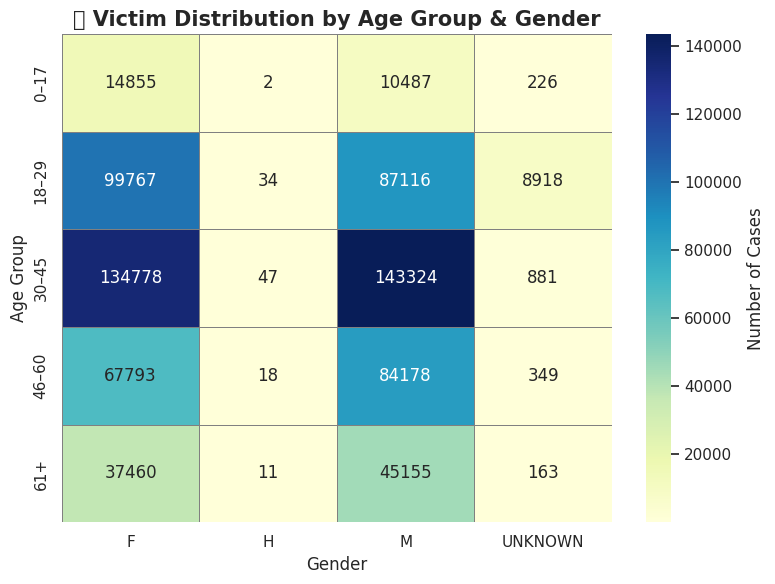

In [298]:
# Create age groups
crime_data['Age Group'] = pd.cut(
    crime_data['Vict Age'],
    bins=[0, 17, 29, 45, 60, 100],
    labels=['0–17', '18–29', '30–45', '46–60', '61+']
)

# Pivot for heatmap
heatmap_data = crime_data.pivot_table(
    index='Age Group',
    columns='Vict Sex',
    values='DR_NO',
    aggfunc='count'
)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Cases'}
)
plt.title('📊 Victim Distribution by Age Group & Gender', fontsize=15, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


In [299]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Year,Month,Day,Weekday,Season,Hour,Age Group
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,CENTRAL,182,1,330,BURGLARY FROM VEHICLE,...,NaN,34.0444,-118.2628,2020,2,8,Saturday,Winter,18,46–60
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,SOUTHWEST,356,1,480,BIKE - STOLEN,...,NaN,34.0210,-118.3002,2020,11,4,Wednesday,Autumn,17,18–29
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,VAN NUYS,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,34.1576,-118.4387,2020,3,10,Tuesday,Spring,20,18–29
11,200406391,03/02/2020 12:00:00 AM,2020-03-01,14:30,4,HOLLENBECK,407,1,310,BURGLARY,...,NaN,34.0881,-118.1877,2020,3,1,Sunday,Spring,14,18–29
19,200606074,02/12/2020 12:00:00 AM,2020-02-07,16:15,6,HOLLYWOOD,646,2,805,PIMPING,...,MC CADDEN,34.1016,-118.3370,2020,2,7,Friday,Winter,16,18–29


<ipython-input-300-d58923e76070>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_data, x='Hour', palette='mako')


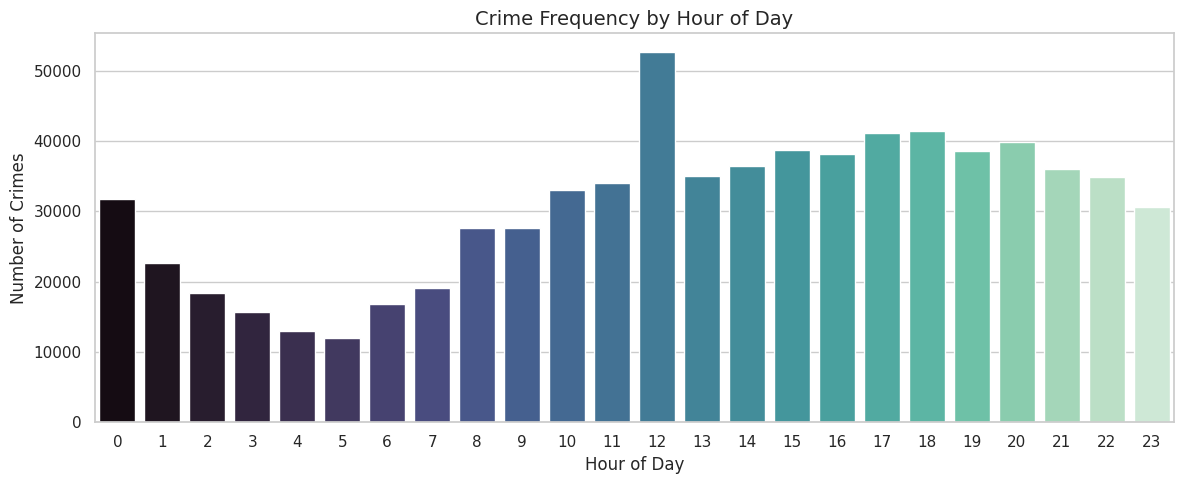

In [300]:
# Crimes by hour
plt.figure(figsize=(12, 5))
sns.countplot(data=crime_data, x='Hour', palette='mako')
plt.title('Crime Frequency by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


<ipython-input-301-c34ed7f9e3dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_data, x='Weekday', order=order_days, palette='crest')


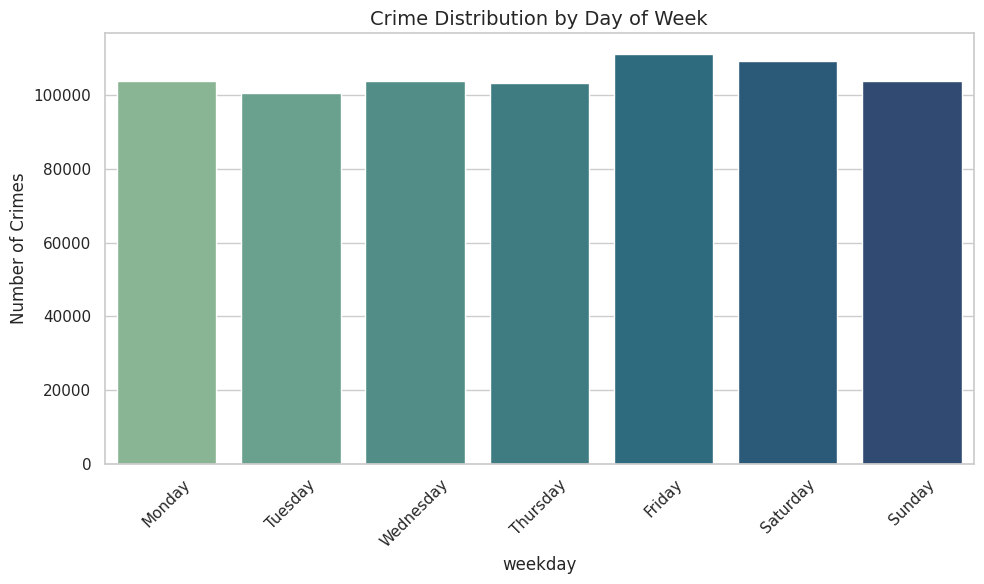

In [301]:
# Crimes by day of week
plt.figure(figsize=(10, 6))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=crime_data, x='Weekday', order=order_days, palette='crest')
plt.title('Crime Distribution by Day of Week', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('weekday')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

<ipython-input-302-2f7d2c4e6b0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_data, x='Month', order=month_order, palette='flare')


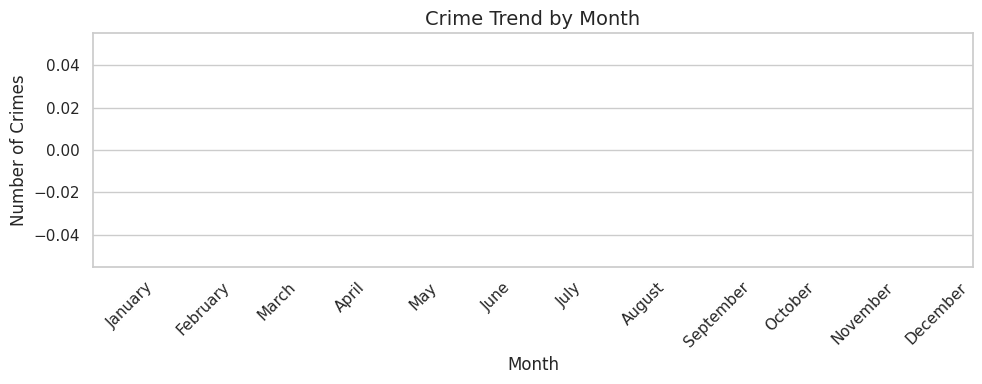

In [302]:
# Crimes by month
plt.figure(figsize=(10, 4))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=crime_data, x='Month', order=month_order, palette='flare')
plt.title('Crime Trend by Month', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

<ipython-input-303-a53e7baa98b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weapons, x='Frequency', y='Weapon Type', palette='coolwarm')


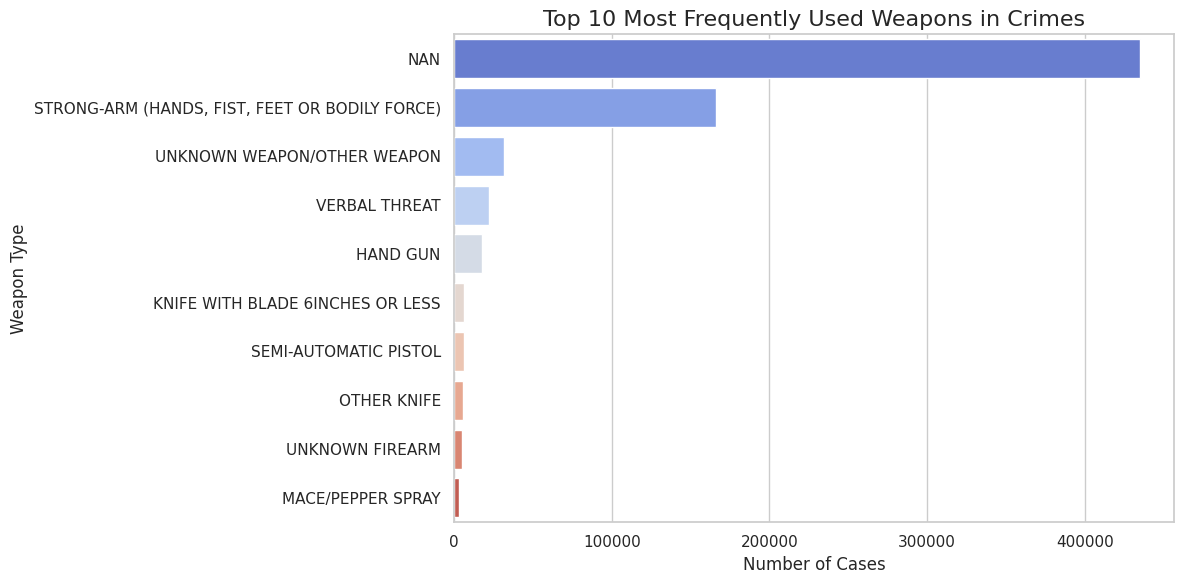

In [303]:
# Filter out missing or unknown weapon types
weapon_counts = crime_data['Weapon Desc'].fillna('NO WEAPON').value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Frequency']

# Select top 10 weapon types for clarity
top_weapons = weapon_counts.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_weapons, x='Frequency', y='Weapon Type', palette='coolwarm')
plt.title('Top 10 Most Frequently Used Weapons in Crimes', fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.show()


<ipython-input-304-0e08ae88f01c>:25: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


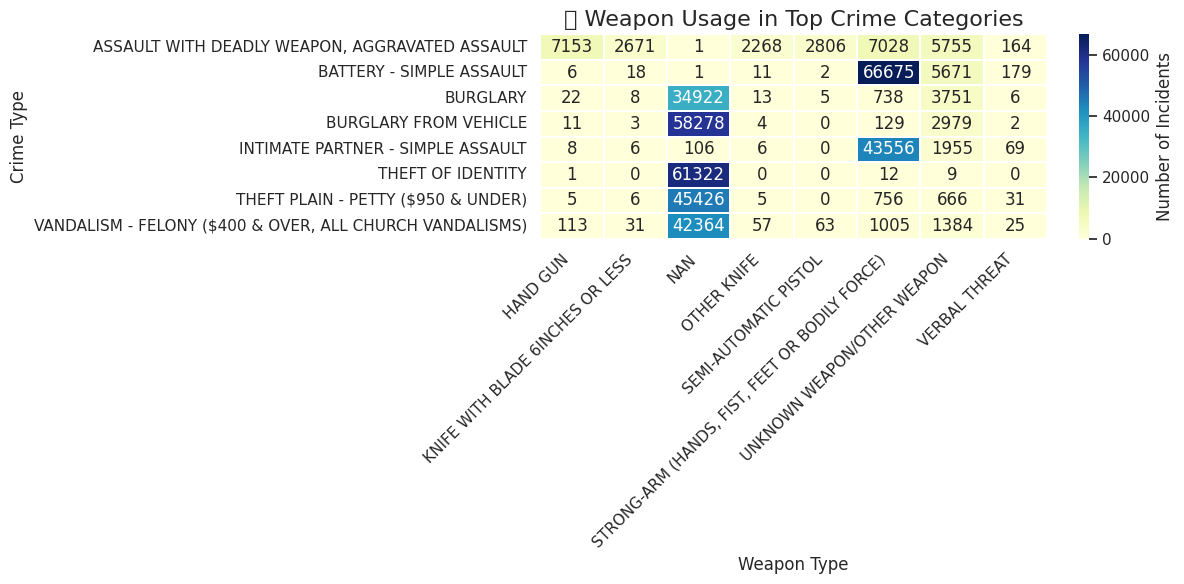

In [304]:
# Grouping the data: Only use rows where 'Weapon Desc' is not missing
filtered_data = crime_data.dropna(subset=['Weapon Desc', 'Crm Cd Desc'])

# Limit to top 8 crimes and top 8 weapons to reduce clutter
top_crimes = filtered_data['Crm Cd Desc'].value_counts().head(8).index
top_weapons = filtered_data['Weapon Desc'].value_counts().head(8).index

# Filter for these top categories
heatmap_data = filtered_data[
    filtered_data['Crm Cd Desc'].isin(top_crimes) &
    filtered_data['Weapon Desc'].isin(top_weapons)
]

# Group and reshape
heatmap_matrix = heatmap_data.groupby(['Crm Cd Desc', 'Weapon Desc']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.3, cbar_kws={'label': 'Number of Incidents'})
plt.title("🔥 Weapon Usage in Top Crime Categories", fontsize=16)
plt.xlabel("Weapon Type", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-305-fb0983da5f4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weapons, x='Frequency', y='Weapon Type', palette='coolwarm')


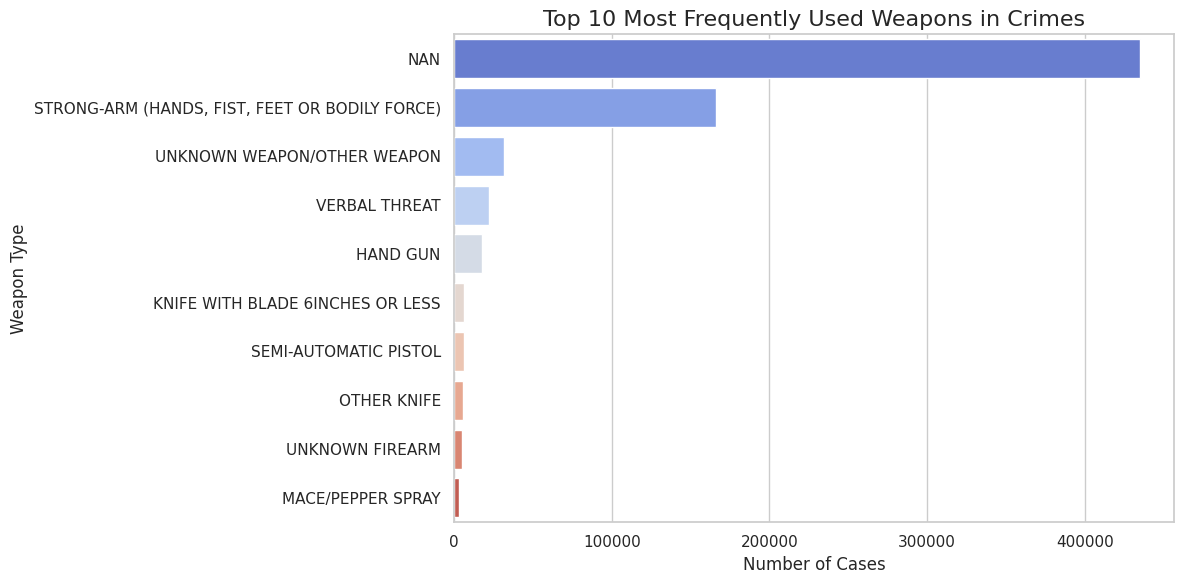

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out missing or unknown weapon types
weapon_counts = crime_data['Weapon Desc'].fillna('NO WEAPON').value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Frequency']

# Select top 10 weapon types for clarity
top_weapons = weapon_counts.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_weapons, x='Frequency', y='Weapon Type', palette='coolwarm')
plt.title('Top 10 Most Frequently Used Weapons in Crimes', fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.show()


In [306]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Year,Month,Day,Weekday,Season,Hour,Age Group
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,CENTRAL,182,1,330,BURGLARY FROM VEHICLE,...,NaN,34.0444,-118.2628,2020,2,8,Saturday,Winter,18,46–60
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,SOUTHWEST,356,1,480,BIKE - STOLEN,...,NaN,34.0210,-118.3002,2020,11,4,Wednesday,Autumn,17,18–29
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,VAN NUYS,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,34.1576,-118.4387,2020,3,10,Tuesday,Spring,20,18–29
11,200406391,03/02/2020 12:00:00 AM,2020-03-01,14:30,4,HOLLENBECK,407,1,310,BURGLARY,...,NaN,34.0881,-118.1877,2020,3,1,Sunday,Spring,14,18–29
19,200606074,02/12/2020 12:00:00 AM,2020-02-07,16:15,6,HOLLYWOOD,646,2,805,PIMPING,...,MC CADDEN,34.1016,-118.3370,2020,2,7,Friday,Winter,16,18–29


In [319]:
# # Replace 'Date' with your actual date column name
# crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')

# # Extract abbreviated month name (e.g., Jan, Feb)
# crime_data['Month_Name'] = crime_data['Date'].dt.strftime('%b')

# # Set the correct month order
# month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
#                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Group by Month_Name and count occurrences
# monthly_counts = crime_data.groupby('Month_Name').size().reindex(month_order)

# # Plot
# plt.figure(figsize=(12, 6))
# sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='crest')
# plt.title('Crime Count per Month (All Years)', fontsize=16)
# plt.xlabel('Month')
# plt.ylabel('Number of Crimes')
# plt.tight_layout()
# plt.show()



In [310]:
# Make sure 'DATE OCC' is datetime and 'Month' exists
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], errors='coerce')
crime_data['Month'] = crime_data['DATE OCC'].dt.month_name()

# Count crimes by Month and Crime Description
monthly_crime_type = crime_data.groupby(['Month', 'Crm Cd Desc']).size().reset_index(name='Count')

# Sort by Month (using ordered categorical for proper sorting)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_crime_type['Month'] = pd.Categorical(monthly_crime_type['Month'], categories=month_order, ordered=True)

# Get the most common crime per month
most_common_per_month = monthly_crime_type.sort_values(['Month', 'Count'], ascending=[True, False]) \
                                          .groupby('Month').first().reset_index()

# Display
print(most_common_per_month)


        Month               Crm Cd Desc  Count
0     January  BATTERY - SIMPLE ASSAULT   6885
1    February  BATTERY - SIMPLE ASSAULT   6463
2       March  BATTERY - SIMPLE ASSAULT   6613
3       April  BATTERY - SIMPLE ASSAULT   6230
4         May  BATTERY - SIMPLE ASSAULT   6166
5        June  BATTERY - SIMPLE ASSAULT   5873
6        July  BATTERY - SIMPLE ASSAULT   6355
7      August  BATTERY - SIMPLE ASSAULT   6253
8   September  BATTERY - SIMPLE ASSAULT   6034
9     October  BATTERY - SIMPLE ASSAULT   6163
10   November  BATTERY - SIMPLE ASSAULT   5487
11   December  BATTERY - SIMPLE ASSAULT   5353


<ipython-input-310-fb4cd89bbc97>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month').first().reset_index()


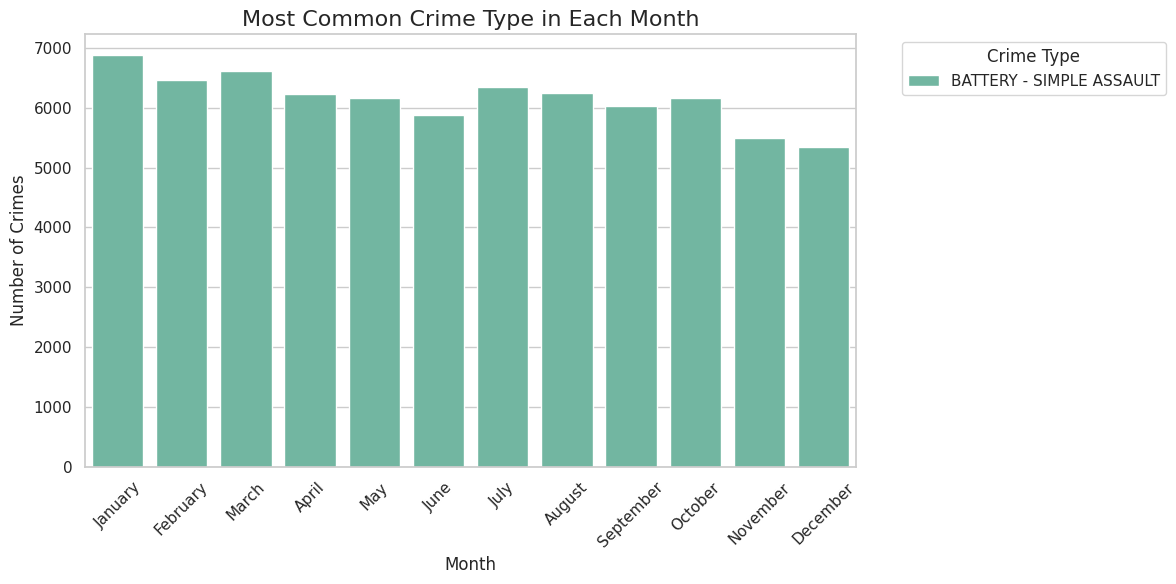

In [311]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', hue='Crm Cd Desc', data=most_common_per_month, dodge=False, palette='Set2')
plt.title("Most Common Crime Type in Each Month", fontsize=16)
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-312-b894418ddbd7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='magma')


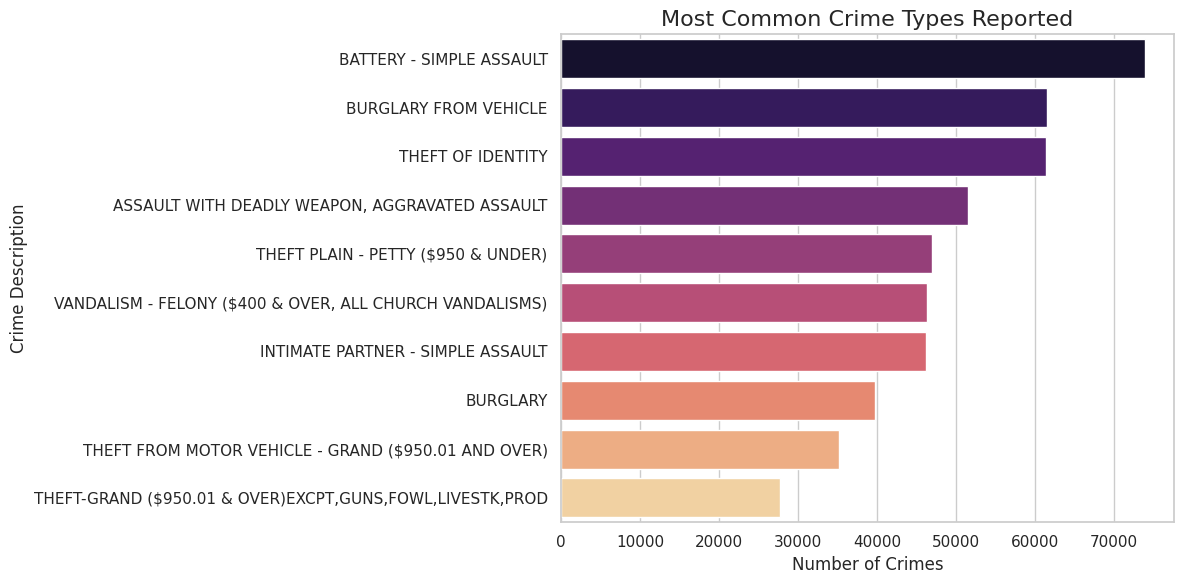

In [312]:
# top_areas = crime_data['AREA NAME'].value_counts().head(10)

# plt.figure(figsize=(12,6))
# sns.barplot(x=top_areas.values, y=top_areas.index, palette='rocket')
# plt.title('Top 10 Areas with Most Reported Crimes (2020–Present)', fontsize=16)
# plt.xlabel('Number of Crimes')
# plt.ylabel('Area Name')
# plt.tight_layout()
# plt.show()
top_crimes = crime_data['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='magma')
plt.title('Most Common Crime Types Reported', fontsize=16)
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.tight_layout()
plt.show()


In [322]:
# # Convert 'Year-Month' to string for plotting
# monthly_trend['Year-Month'] = monthly_trend['Year-Month'].astype(str)

# # Plot overall crime trend
# plt.figure(figsize=(14, 6))
# sns.lineplot(data=monthly_trend, x='Year-Month', y='Crime Count', marker='o')
# plt.axvspan('2020-03', '2020-06', color='red', alpha=0.2, label='COVID Lockdown')
# plt.title('Monthly Crime Trend in LA (2020–Present)', fontsize=16)
# plt.xlabel('Month')
# plt.ylabel('Total Crimes')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()



<ipython-input-323-7cb26e2c3e27>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_crimes, x='COVID Phase', y='Avg Monthly Crimes', palette='coolwarm')


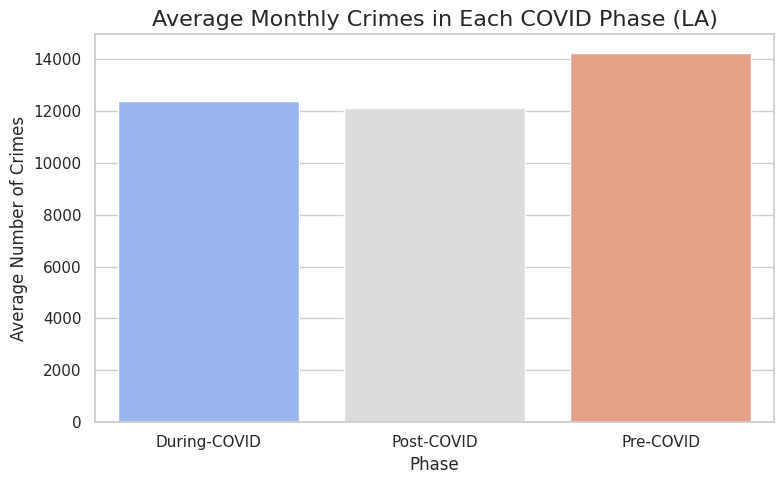

In [323]:


# Ensure date is datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Create 'Phase' column for COVID comparison
def get_covid_phase(date):
    if date < pd.Timestamp('2020-03-01'):
        return 'Pre-COVID'
    elif pd.Timestamp('2020-03-01') <= date <= pd.Timestamp('2021-06-30'):
        return 'During-COVID'
    else:
        return 'Post-COVID'

crime_data['COVID Phase'] = crime_data['DATE OCC'].apply(get_covid_phase)

# Group by phase and get average crimes per month
crime_data['Year-Month'] = crime_data['DATE OCC'].dt.to_period('M')
monthly_crimes = crime_data.groupby(['COVID Phase', 'Year-Month']).size().reset_index(name='Crime Count')

# Now calculate the average crimes per phase
avg_crimes = monthly_crimes.groupby('COVID Phase')['Crime Count'].mean().reset_index()
avg_crimes.columns = ['COVID Phase', 'Avg Monthly Crimes']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_crimes, x='COVID Phase', y='Avg Monthly Crimes', palette='coolwarm')
plt.title('Average Monthly Crimes in Each COVID Phase (LA)', fontsize=16)
plt.ylabel('Average Number of Crimes')
plt.xlabel('Phase')
plt.tight_layout()
plt.show()


<ipython-input-324-cd9cf9365dbd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_crime_counts.values, y=covid_crime_counts.index, palette="rocket")


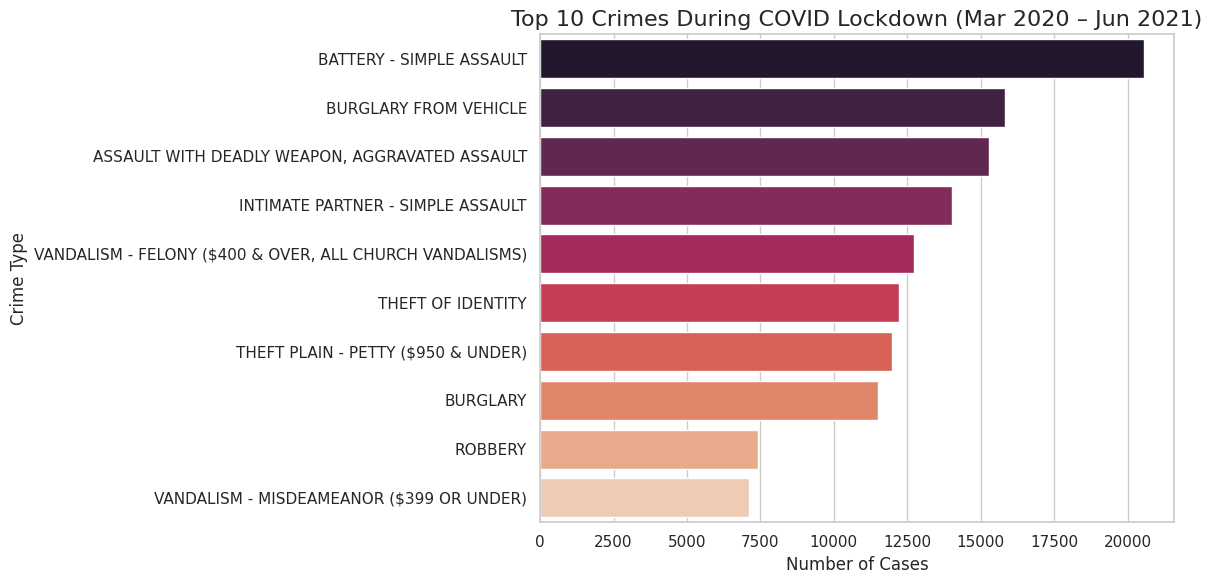

In [324]:

# Step 1: Filter for COVID lockdown period (adjust as needed)
covid_period = crime_data[(crime_data['DATE OCC'] >= '2020-03-01') & (crime_data['DATE OCC'] <= '2021-06-30')]

# Step 2: Count crimes during that period
covid_crime_counts = covid_period['Crm Cd Desc'].value_counts().head(10)

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=covid_crime_counts.values, y=covid_crime_counts.index, palette="rocket")
plt.title('Top 10 Crimes During COVID Lockdown (Mar 2020 – Jun 2021)', fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


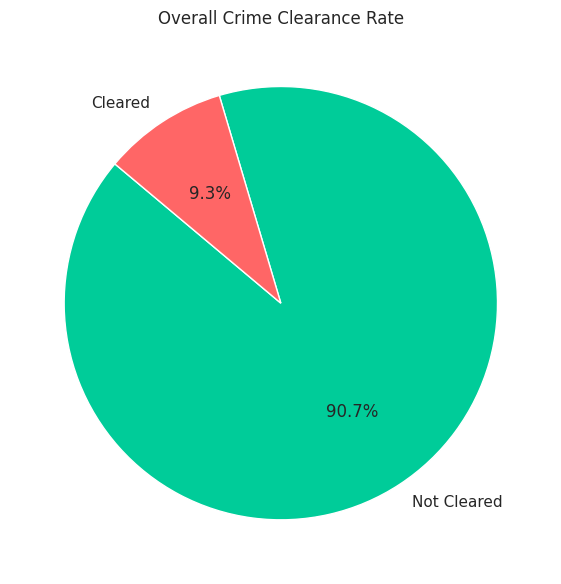

In [325]:
# Create a new column for clarity
crime_data['Cleared'] = crime_data['Status Desc'].apply(lambda x: 'Cleared' if 'Arrest' in str(x) else 'Not Cleared')

# Count cleared vs not cleared
clearance_counts = crime_data['Cleared'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
colors = ['#00cc99','#ff6666']
plt.pie(clearance_counts, labels=clearance_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Overall Crime Clearance Rate')
plt.tight_layout()
plt.show()


<ipython-input-326-95c9e4d656f9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clearance['Clearance Rate (%)'], y=top_clearance.index, palette='coolwarm')


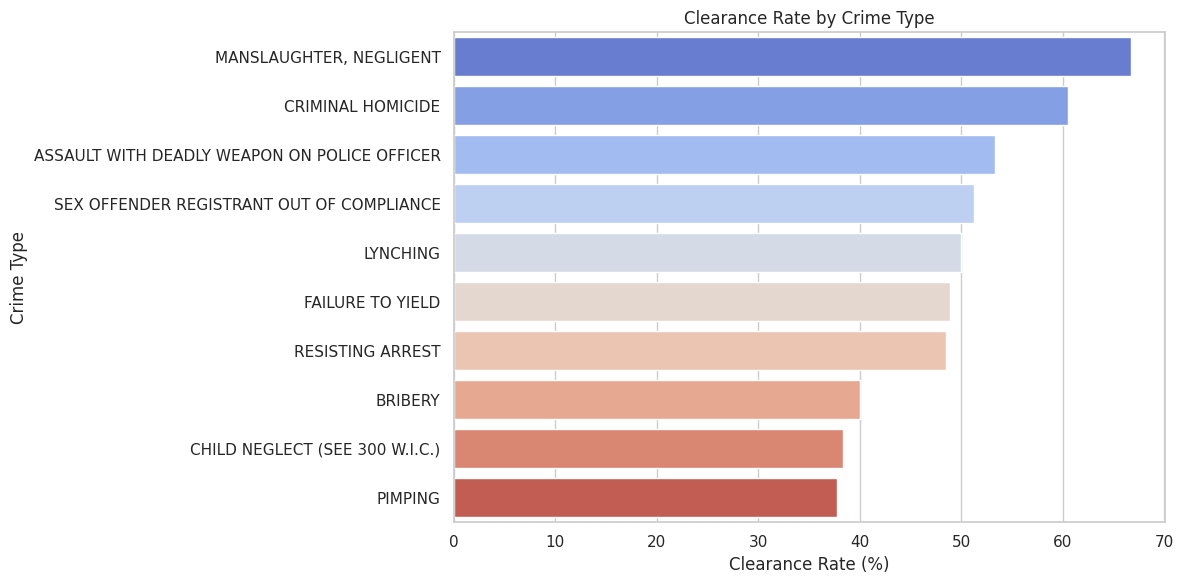

In [326]:
# Group by crime and clearance
clearance_by_crime = crime_data.groupby(['Crm Cd Desc', 'Cleared']).size().unstack(fill_value=0)

# Calculate clearance rate per crime type
clearance_by_crime['Clearance Rate (%)'] = round(
    (clearance_by_crime['Cleared'] / (clearance_by_crime['Cleared'] + clearance_by_crime['Not Cleared'])) * 100, 1)

# Take top 10 crimes for clarity
top_clearance = clearance_by_crime.sort_values(by='Clearance Rate (%)', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_clearance['Clearance Rate (%)'], y=top_clearance.index, palette='coolwarm')
plt.xlabel('Clearance Rate (%)')
plt.ylabel('Crime Type')
plt.title('Clearance Rate by Crime Type')
plt.tight_layout()
plt.show()


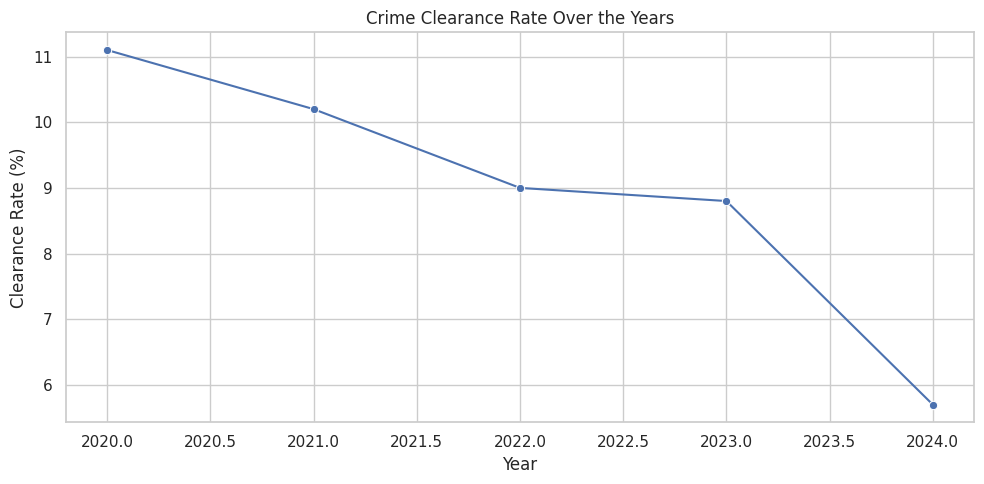

In [327]:
# Extract year
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Group by year and clearance
clearance_by_year = crime_data.groupby(['Year', 'Cleared']).size().unstack(fill_value=0)
clearance_by_year['Clearance Rate (%)'] = round(
    (clearance_by_year['Cleared'] / (clearance_by_year.sum(axis=1))) * 100, 1)

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=clearance_by_year, x=clearance_by_year.index, y='Clearance Rate (%)', marker='o')
plt.title('Crime Clearance Rate Over the Years')
plt.ylabel('Clearance Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()
